In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

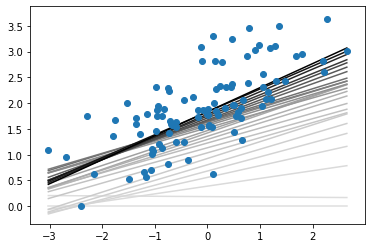

In [94]:
def miniBatchGD(X,Y,batch_size = 20,learn_rate=0.005,num_iter=25):
    '''this function will create mini batch samples from data and experience
    gradient descent on them'''
    
    n_points = X.shape[0] #returns number of rows
    w = np.zeros(X.shape[1]) #returns number of columns which is 1 then creates numpy array of zeros with the same number
    b = 0 #intercept
    
    regression_coef = [np.hstack((w,b))] #creates an array inside an array of w and b result: [[0.,0.]]
    for i in range (num_iter):
        batch = np.random.choice(range(n_points),batch_size) #return 20 random points(batch size is 20) between 0 amd 100
        X_batch = X[batch,:] #return the value of the corresponding position in the X values(ex: batch has array[2,3,4,5,6]) so X[batch,:] will return the values in X which has position 2,3,4,5..
        Y_batch = Y[batch] #return the value of the correpondint position in the Y value
        w,b = MSEStep(X_batch,Y_batch,w,b,learn_rate,n_points)
        regression_coef.append(np.hstack((w,b))) #the new w and b will be recorded inside this
        
    return regression_coef    

def MSEStep(X,Y,w,b,learn_rate,n_points):
    y_pred = np.matmul(X,w) + b #returns the product of two arrays and add b 
    error = Y - y_pred #this is the error
    
    W_new = w + learn_rate * np.matmul(error,X) #we need to apply the derivative on MSE formula with respect to w
    b_new = b + learn_rate * error.sum() #we need to apply the derivative on MSE formula with respect to b
    return W_new,b_new

data = np.loadtxt('data.csv',delimiter=",") #load data

X = data[:,:-1] #split values into x and y and take x
Y = data[:,-1] #split values into x and y and take y

regression_coef = miniBatchGD(X,Y) #call the mini batch gradient descent function

plt.figure() 
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)] #changing the color of each line
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color) #we need to points to draw a line so we take the minimum as first point and the change of w and b as second
plt.scatter(X, Y, zorder = 3)
plt.show()